In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,bushjunior,bushsenior,carter,clinton,johnson,kennedy,nixon,obama,reagan,trump
aaron,0,0,0,2,0,0,0,0,0,0
abandon,1,0,1,0,0,1,0,0,0,0
abandoned,0,0,1,0,0,0,0,0,0,0
abandoning,0,0,0,0,0,0,1,0,0,0
abandonment,0,0,0,0,0,1,0,0,0,0


In [2]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'bushjunior': [('america', 30),
  ('people', 29),
  ('congress', 27),
  ('new', 25),
  ('year', 24),
  ('iraq', 21),
  ('american', 19),
  ('weve', 18),
  ('nation', 18),
  ('help', 18),
  ('trust', 17),
  ('terrorists', 14),
  ('future', 13),
  ('forces', 13),
  ('world', 13),
  ('iraqi', 12),
  ('ask', 12),
  ('country', 12),
  ('come', 11),
  ('empower', 11),
  ('past', 11),
  ('americans', 11),
  ('years', 11),
  ('hope', 11),
  ('al', 11),
  ('government', 11),
  ('security', 10),
  ('agreement', 10),
  ('good', 10),
  ('build', 9)],
 'bushsenior': [('people', 26),
  ('know', 24),
  ('plan', 23),
  ('world', 22),
  ('right', 19),
  ('american', 18),
  ('help', 18),
  ('new', 17),
  ('country', 16),
  ('make', 15),
  ('congress', 14),
  ('time', 13),
  ('health', 13),
  ('good', 12),
  ('tax', 12),
  ('federal', 11),
  ('tell', 11),
  ('government', 10),
  ('america', 10),
  ('economy', 9),
  ('year', 9),
  ('pay', 9),
  ('things', 9),
  ('let', 9),
  ('im', 9),
  ('family', 8),
 

In [3]:
# Print the top 15 words said by each comedian
for president, top_words in top_dict.items():
    print(president)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

bushjunior
america, people, congress, new, year, iraq, american, weve, nation, help, trust, terrorists, future, forces
---
bushsenior
people, know, plan, world, right, american, help, new, country, make, congress, time, health, good
---
carter
soviet, world, peace, america, union, nations, states, security, military, united, people, continue, oil, nation
---
clinton
new, ask, people, make, years, help, children, america, thank, tonight, want, work, year, american
---
johnson
congress, years, year, think, believe, world, tonight, hope, time, peace, want, great, american, nation
---
kennedy
world, nations, free, tax, defense, new, year, peace, years, alliance, billion, need, freedom, people
---
nixon
years, year, peace, america, world, new, people, congress, american, time, energy, states, great, make
---
obama
thats, america, people, just, world, work, american, make, new, want, change, years, year, economy
---
reagan
america, freedom, government, years, world, lets, budget, family, peo

In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each president
words = []
for president in data.columns:
    top = [word for (word, count) in top_dict[president]]
    for t in top:
        words.append(t)
        
words

['america',
 'people',
 'congress',
 'new',
 'year',
 'iraq',
 'american',
 'weve',
 'nation',
 'help',
 'trust',
 'terrorists',
 'future',
 'forces',
 'world',
 'iraqi',
 'ask',
 'country',
 'come',
 'empower',
 'past',
 'americans',
 'years',
 'hope',
 'al',
 'government',
 'security',
 'agreement',
 'good',
 'build',
 'people',
 'know',
 'plan',
 'world',
 'right',
 'american',
 'help',
 'new',
 'country',
 'make',
 'congress',
 'time',
 'health',
 'good',
 'tax',
 'federal',
 'tell',
 'government',
 'america',
 'economy',
 'year',
 'pay',
 'things',
 'let',
 'im',
 'family',
 'tonight',
 'thing',
 'reform',
 'work',
 'soviet',
 'world',
 'peace',
 'america',
 'union',
 'nations',
 'states',
 'security',
 'military',
 'united',
 'people',
 'continue',
 'oil',
 'nation',
 'power',
 'preserve',
 'energy',
 'afghanistan',
 'time',
 'east',
 'region',
 'meet',
 'challenge',
 'congress',
 'national',
 'help',
 'middle',
 'forces',
 'new',
 'year',
 'new',
 'ask',
 'people',
 'make',
 'ye

In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('year', 10),
 ('world', 10),
 ('america', 9),
 ('people', 9),
 ('american', 9),
 ('congress', 8),
 ('new', 8),
 ('years', 8),
 ('nation', 7),
 ('americans', 7),
 ('country', 6),
 ('make', 6),
 ('time', 6),
 ('help', 5),
 ('tonight', 5),
 ('work', 5),
 ('peace', 5),
 ('united', 5),
 ('just', 5),
 ('government', 4),
 ('security', 4),
 ('nations', 4),
 ('states', 4),
 ('weve', 3),
 ('future', 3),
 ('know', 3),
 ('health', 3),
 ('tax', 3),
 ('federal', 3),
 ('let', 3),
 ('want', 3),
 ('need', 3),
 ('forces', 2),
 ('ask', 2),
 ('come', 2),
 ('past', 2),
 ('hope', 2),
 ('agreement', 2),
 ('good', 2),
 ('right', 2),
 ('economy', 2),
 ('im', 2),
 ('family', 2),
 ('union', 2),
 ('energy', 2),
 ('national', 2),
 ('believe', 2),
 ('great', 2),
 ('president', 2),
 ('budget', 2),
 ('administration', 2),
 ('free', 2),
 ('freedom', 2),
 ('today', 2),
 ('economic', 2),
 ('ago', 2),
 ('americas', 2),
 ('like', 2),
 ('iraq', 1),
 ('trust', 1),
 ('terrorists', 1),
 ('iraqi', 1),
 ('empower', 1),
 ('al'

In [6]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['year',
 'world',
 'america',
 'people',
 'american',
 'congress',
 'new',
 'years',
 'nation',
 'americans']

In [7]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [8]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

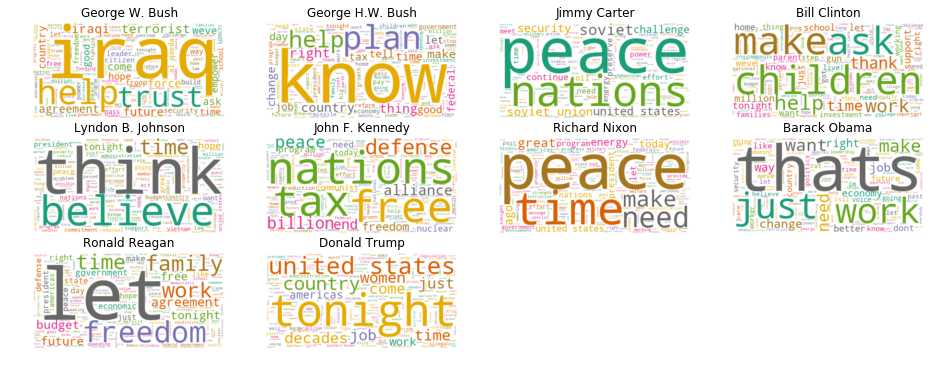

In [9]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['George W. Bush', 'George H.W. Bush', 'Jimmy Carter', 'Bill Clinton', 'Lyndon B. Johnson', 'John F. Kennedy', 'Richard Nixon', 'Barack Obama', 'Ronald Reagan', 'Donald Trump']
run_times = [53, 52, 33, 90, 44, 45, 44, 61, 44, 52]

# Create subplots for each president
for index, president in enumerate(data.columns):
    wc.generate(data_clean.transcript[president])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [10]:
# Find the number of unique words that each president uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for president in data.columns:
    uniques = data[president].nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, run_times, unique_list)), columns=['president', 'speech_time', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,president,speech_time,unique_words
2,Jimmy Carter,33,822
4,Lyndon B. Johnson,44,950
6,Richard Nixon,44,968
8,Ronald Reagan,44,1159
1,George H.W. Bush,52,1170
7,Barack Obama,61,1378
5,John F. Kennedy,45,1387
9,Donald Trump,52,1393
0,George W. Bush,53,1395
3,Bill Clinton,90,1679


In [11]:
# Calculate the words per minute of each president

# Find the total number of words that a president uses
total_list = []
for president in data.columns:
    totals = sum(data[president])
    total_list.append(totals)
    
# # Speech length in minutes
# run_times = [53, 52, 33, 90, 44, 45, 44, 61, 44, 52]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='unique_words')
data_wpm_sort

,president,speech_time,unique_words,total_words,run_times,words_per_minute
2,Jimmy Carter,33,822,1593,33,48.272727
4,Lyndon B. Johnson,44,950,3366,44,76.500000
6,Richard Nixon,44,968,2150,44,48.863636
8,Ronald Reagan,44,1159,2240,44,50.909091
1,George H.W. Bush,52,1170,2252,52,43.307692
7,Barack Obama,61,1378,2761,61,45.262295
5,John F. Kennedy,45,1387,2493,45,55.400000
9,Donald Trump,52,1393,2535,52,48.750000
0,George W. Bush,53,1395,2819,53,53.188679
3,Bill Clinton,90,1679,4252,90,47.244444
